# **Recipe Data - EDA**

In this secion, we'll explore the raw recipe dataset, found here: 


https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions?datasetId=311962&sortBy=voteCount


The data comes from food.com - let's first pull in the data and take a look at the basic structure


## Setup:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os

In [2]:
path = '/content/drive/MyDrive/recipe_recos'

In [3]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [4]:
df_review = pd.read_csv('RAW_interactions.csv') # import review data
df_recipe = pd.read_csv('RAW_recipes.csv') # import review data

In [5]:
#df_recipe = pd.read_csv(os.path.join(path,'RAW_recipes.csv'))
#df_review = pd.read_csv(os.path.join(path,'RAW_interactions.csv')) # import review data

In [6]:
# df_review_trian = pd.read_csv(os.path.join(path,'interactions_train.csv'),engine='python')
# df_review_test  = pd.read_csv(os.path.join(path,'interactions_test.csv'),engine='python')
# df_review_val   = pd.read_csv(os.path.join(path,'interactions_validation.csv'),engine='python')

In [7]:
## Review Data

## Review Data

In [8]:
df_review.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [9]:
# how many unique ratings?
df_review.count()

user_id      1132367
recipe_id    1132367
date         1132367
rating       1132367
review       1132198
dtype: int64

In [10]:
# how many recipes have reviews?
df_review['recipe_id'].nunique()

231637

In [11]:
# how many reviewers?
df_review['user_id'].nunique()

226570

### Get the count of unique ratings for each user

In [12]:
# How many ratings do users submit on average:
user_rating_counts = df_review.groupby('user_id').agg({'recipe_id':'count','rating':'mean'}).reset_index().sort_values(by='recipe_id')
user_rating_counts = user_rating_counts.rename(columns={'recipe_id': 'ratings_count'})
user_rating_counts['ratings_count'].mean()

4.997868208500684

In [13]:
# how often do reviewers only have 1 rating?
user_rating_counts['one_rating'] = np.where(user_rating_counts['ratings_count'] == 1,1,0)
user_rating_counts.groupby('one_rating').agg({'user_id':'nunique'}).reset_index()



,one_rating,user_id
0,0,60314
1,1,166256


In [14]:
166256 / (166256+60314)

0.7337952950523017

In [15]:
# bucket the rating count

user_rating_counts['rating_bucket'] = np.where(user_rating_counts['ratings_count']==1,
                                               "1",
                                               '')

user_rating_counts['rating_bucket'] = np.where((user_rating_counts['ratings_count']>1)&(user_rating_counts['ratings_count']<=10),
                                               "2-10",
                                               user_rating_counts['rating_bucket'])


user_rating_counts['rating_bucket'] = np.where((user_rating_counts['ratings_count']>10)&(user_rating_counts['ratings_count']<=100),
                                               "11-100",
                                               user_rating_counts['rating_bucket'])


user_rating_counts['rating_bucket'] = np.where((user_rating_counts['ratings_count']>100)&(user_rating_counts['ratings_count']<=1000),
                                               "100-1000",
                                               user_rating_counts['rating_bucket'])


user_rating_counts['rating_bucket'] = np.where((user_rating_counts['ratings_count']>1000),
                                               "> 1000",
                                               user_rating_counts['rating_bucket'])

In [16]:
df_ratings_bucket = user_rating_counts.groupby('rating_bucket').agg({'user_id':'nunique'}).reset_index()
df_ratings_bucket

,rating_bucket,user_id
0,1,166256
1,100-1000,1272
2,11-100,10078
3,2-10,48868
4,> 1000,96


In [17]:
user_rating_counts

,user_id,ratings_count,rating,one_rating,rating_bucket
113284,1579230,1,4.000000,1,1
149938,2744132,1,4.000000,1,1
149939,2744161,1,5.000000,1,1
149940,2744177,1,0.000000,1,1
149942,2744231,1,5.000000,1,1
...,...,...,...,...,...
15168,128473,3917,4.908348,0,> 1000
20019,169430,4076,4.693327,0,> 1000
43248,383346,4628,4.755186,0,> 1000
3826,37449,5603,4.783866,0,> 1000


### Get the count of reviews per recipe

In [18]:
# How many ratings do users submit on average:
recipe_rating_counts = df_review.groupby('recipe_id').agg({'user_id':'count','rating':'mean'}).reset_index().sort_values(by='recipe_id')
recipe_rating_counts = recipe_rating_counts.rename(columns={'user_id': 'recipe_ratings_count'})
recipe_rating_counts['recipe_ratings_count'].mean()

4.888541122532238

In [19]:
recipe_rating_counts

,recipe_id,recipe_ratings_count,rating
0,38,4,4.250000
1,39,1,3.000000
2,40,9,4.333333
3,41,2,4.500000
4,43,1,1.000000
...,...,...,...
231632,537459,1,5.000000
231633,537485,1,5.000000
231634,537543,1,0.000000
231635,537671,1,0.000000


Text(0, 0.5, 'Dist')

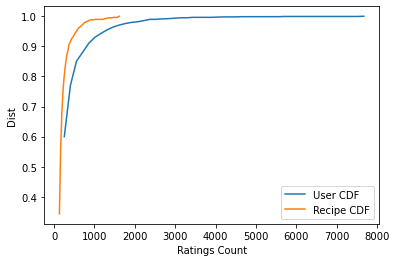

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
  
# # No of Data points
# N = 500
  
# # initializing random values
# data = np.random.randn(N)
# getting data of the histogram

tmp_users_rating_count  = user_rating_counts[user_rating_counts['ratings_count'] > 100]
tmp_recipe_rating_count = recipe_rating_counts[recipe_rating_counts['recipe_ratings_count'] > 100]

count_u, bins_count_u = np.histogram(tmp_users_rating_count['ratings_count'].to_numpy(), bins=50)
count_r, bins_count_r = np.histogram(tmp_recipe_rating_count['recipe_ratings_count'].to_numpy(), bins=50) 

# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
pdf_u = count_u / sum(count_u)
cdf_u = np.cumsum(pdf_u)

pdf_r = count_r / sum(count_r)
cdf_r = np.cumsum(pdf_r)
  
# plotting PDF and CDF
plt.plot(bins_count_u[1:], cdf_u, label="User CDF")
plt.plot(bins_count_r[1:], cdf_r, label="Recipe CDF")
plt.legend()
plt.xlabel('Ratings Count')
plt.ylabel('Dist')

###Get the ratings average

In [21]:
# How many ratings does the average recipe have:
data_recipe = df_review.groupby('recipe_id').agg({'user_id':'nunique'}).reset_index().sort_values(by='user_id',ascending=False)
data_recipe['user_id'].mean()


4.888541122532238

In [22]:
# what is the average rating?
df_review['rating'].mean()

4.411016039852804

[Text(0.5, 1.0, 'Recipe Rating Distribution')]

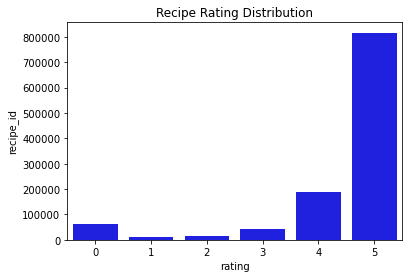

In [23]:
ratings_dist = df_review.groupby('rating').agg({'recipe_id':'count'}).reset_index()

sns.barplot(data=ratings_dist, x="rating",y="recipe_id",color = 'blue').set(title='Recipe Rating Distribution')

# Colaborative based filtering

In [24]:
pip install surprise

Looking in indexes: https://artifactory-haproxy.service.intradsm1.consul.csnzoo.com:8099/artifactory/api/pypi/python/simple, https://artifactory-haproxy.service.intradsm1.consul.csnzoo.com:8099/artifactory/api/pypi/pypi-mirror/simple
Note: you may need to restart the kernel to use updated packages.


In [25]:
from surprise.dataset import Dataset
from surprise.reader import Reader
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse
from surprise import SVD, KNNBaseline, KNNBasic, KNNWithMeans
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

from collections import defaultdict

## First some data cleaning

In [26]:
# filter down to only users who have more than x ratings

def filt_data(df, more_than_x_reviews_per_user, more_than_x_reviews_per_recipe):
  df_mrg = df.merge(user_rating_counts[['user_id','ratings_count']],
                how='left',
                on='user_id')
  
  
  df_mrg = df_mrg.merge(recipe_rating_counts[['recipe_id','recipe_ratings_count']],
                how='left',
                on='recipe_id')
  


  df_filt = df_mrg[df_mrg['ratings_count']>more_than_x_reviews_per_user]
  df_filt = df_filt[df_filt['recipe_ratings_count']>more_than_x_reviews_per_recipe]
  df_filt = df_filt[['user_id','recipe_id','rating']]
  
  # get user and recipe counts
  uniq_users = df_filt['user_id'].nunique()
  uniq_recipes = df_filt['recipe_id'].nunique() 
  




  print('User count of filtered data: %s' % uniq_users)
  print('Recipe count of filtered data: %s' % uniq_recipes) 

  # # change column names
  df_filt = df_filt.rename(columns={'user_id':'userID','recipe_id':'itemID'})

  return df_filt




# use this if we want to remove zero ratings
def filt_zeros(df, remove_zeros):
  if remove_zeros == True:
    df_filt = df[df['rating']!=0]
  else:
    df_filt = df
  return df_filt


In [27]:
remove_zeros = True
min_user_review_count = 10
min_recipe_review_count = 10


df_review_cf_filt = filt_zeros(df_review, remove_zeros)
df_review_cf_filt = filt_data(df_review_cf_filt, min_user_review_count,min_recipe_review_count) # set minimum review count


User count of filtered data: 11416
Recipe count of filtered data: 18673


In [28]:
df_review_cf_filt

,userID,itemID,rating
28,56680,79222,5
39,183565,79222,5
40,101823,79222,5
42,446143,79222,4
43,226989,79222,4
...,...,...,...
1071467,133933,82303,5
1071509,143592,82303,5
1071510,140132,82303,5
1071511,199020,82303,5


### First lets get a baseline of what a random predictor would be

In [29]:
reader = Reader(rating_scale=(1,5))

surprise_reviews = Dataset.load_from_df(df_review_cf_filt, reader)

trainSet = surprise_reviews.build_full_trainset()

In [30]:
algo = NormalPredictor()
cross_validate(algo, surprise_reviews, measures=['RMSE'],cv=5,verbose=True)

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7642  0.7707  0.7583  0.7651  0.7638  0.7644  0.0040  
Fit time          0.47    0.66    0.67    0.66    0.66    0.62    0.08    
Test time         0.76    0.51    0.76    0.74    0.75    0.71    0.10    


{'test_rmse': array([0.76418777, 0.77071018, 0.75826072, 0.76512426, 0.76381382]),
 'fit_time': (0.46640849113464355,
  0.6627330780029297,
  0.669177770614624,
  0.6553745269775391,
  0.6591546535491943),
 'test_time': (0.7648332118988037,
  0.5087230205535889,
  0.7593417167663574,
  0.7446107864379883,
  0.7521777153015137)}

# MODEL #1 - user based Basic KNN

In [31]:
# this will allow us to put the pred results into a df
def get_pred_df(pred):
  df = pd.DataFrame(pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
  return df

In [32]:
Trainset, Testset = train_test_split(surprise_reviews, test_size=.3, random_state=1)

In [33]:
def get_pred_df(pred):
  df = pd.DataFrame(pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
  return df

In [34]:
knnbasic = KNNBasic(sim_options={'name':'cosine',
                                 'user_based':True,
                                 'min_support':True,
                                 'min_k':2})

In [35]:
knnbasic.fit(Trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [36]:
knnbasicpred = knnbasic.test(Testset)

In [37]:
basicknn_rmse = rmse(knnbasicpred)

RMSE: 0.6471


In [38]:
get_pred_df(knnbasicpred)

,uid,iid,rui,est,details
0,328000,62236,2.0,4.250000,"{'actual_k': 4, 'was_impossible': False}"
1,31499,75628,5.0,4.333563,"{'actual_k': 15, 'was_impossible': False}"
2,156842,16575,5.0,4.731029,"{'was_impossible': True, 'reason': 'Not enough..."
3,445711,3092,4.0,4.875277,"{'actual_k': 8, 'was_impossible': False}"
4,1595619,15411,4.0,4.312500,"{'actual_k': 16, 'was_impossible': False}"
...,...,...,...,...,...
109948,562865,42603,5.0,4.599875,"{'actual_k': 40, 'was_impossible': False}"
109949,429769,32317,5.0,4.896026,"{'actual_k': 19, 'was_impossible': False}"
109950,194755,98985,5.0,5.000000,"{'actual_k': 1, 'was_impossible': False}"
109951,47907,62343,4.0,4.638320,"{'actual_k': 11, 'was_impossible': False}"


# MODEL #2 - user based baseline KNN

In [39]:
knnbasic = KNNBaseline(sim_options={'name':'cosine',
                                 'user_based':True,
                                 'min_support':True,
                                 'min_k':2})

knnbasic.fit(Trainset)
knnbasicpred = knnbasic.test(Testset)


Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [40]:
basicknn_rmse = rmse(knnbasicpred)

RMSE: 0.6010


In [41]:
Trainset

# MODEL #3 - item to item based baseline KNN

In [42]:

knnbasic_ii = KNNBaseline(sim_options={'name':'cosine',
                                 'user_based':False,
                                 'min_support':True,
                                 'min_k':2})
knnbasic_ii.fit(Trainset)


Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [43]:
knnbasic_ii_pred = knnbasic_ii.test(Testset)

In [44]:
basicknn_rmse = rmse(knnbasicpred)

RMSE: 0.6010


### return top x 

In [45]:
df_pred_output = get_pred_df(knnbasic_ii_pred)

In [46]:
df_pred_output

,uid,iid,rui,est,details
0,328000,62236,2.0,3.219773,"{'actual_k': 2, 'was_impossible': False}"
1,31499,75628,5.0,4.689628,"{'actual_k': 26, 'was_impossible': False}"
2,156842,16575,5.0,4.569980,"{'actual_k': 0, 'was_impossible': False}"
3,445711,3092,4.0,4.764830,"{'actual_k': 24, 'was_impossible': False}"
4,1595619,15411,4.0,4.274175,"{'actual_k': 4, 'was_impossible': False}"
...,...,...,...,...,...
109948,562865,42603,5.0,4.398760,"{'actual_k': 27, 'was_impossible': False}"
109949,429769,32317,5.0,4.906606,"{'actual_k': 22, 'was_impossible': False}"
109950,194755,98985,5.0,4.805243,"{'actual_k': 1, 'was_impossible': False}"
109951,47907,62343,4.0,4.715582,"{'actual_k': 32, 'was_impossible': False}"


In [47]:
# return the top x predictions
def get_top_recipes(pred, user_id, n):
    pred_mrg = pred.merge(df_recipe[['id','name']],
                          how='left',
                          left_on='iid',
                          right_on='id')
    pred_mrg = pred_mrg[pred_mrg['uid'] == user_id].sort_values(by='est', ascending = False)
    
    pred_mrg = pred_mrg[['uid','iid','name','est']].head(n)
    return pred_mrg


In [48]:
get_top_recipes(df_pred_output, 429769,5)

,uid,iid,name,est
83918,429769,92174,creamed chipped beef sos,5.000000
98491,429769,4050,canadian living s best chocolate chip cookies,4.957678
109949,429769,32317,winter fruit salad with lemon poppy seed dressing,4.906606
14212,429769,11919,irish pub beef stew,4.871549
28009,429769,79595,best twice baked potatoes,4.865895


# Model 4 - SVD

In [49]:
from surprise import SVD
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [50]:

param = {'n_factors':[20,50,80],
         'reg_all':[.04,0.06],
         'n_epochs':[10,20,30],
         'lr_all':[.002,.005,.01]}



In [56]:
rmse_results = []
for i in range(1, 50, 1):
    algo = SVD(n_factors = i)
    avg_rmse = cross_validate(algo, surprise_reviews, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean() 
    rmse_results.append(avg_rmse)
  

In [57]:
def plot_rmse(rmse, algorithm):
    
    plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')
    plt.subplot(2,1,1)
    plt.plot(rmse)
    plt.xlim(0,100)
    plt.title("{0} Performance: RMSE Against Number of Factors".format(algorithm), size = 20 )
    plt.ylabel("Mean RMSE (cv=5)")

    plt.subplot(2,1,2)
    plt.plot(rmse)
    plt.xlim(0,50)
    plt.xticks(np.arange(0, 52, step=2))

    plt.xlabel("{0}(n_factor = k)".format(algorithm))
    plt.ylabel("Mean RMSE (cv=5)")
    plt.axvline(np.argmin(rmse), color = "r")

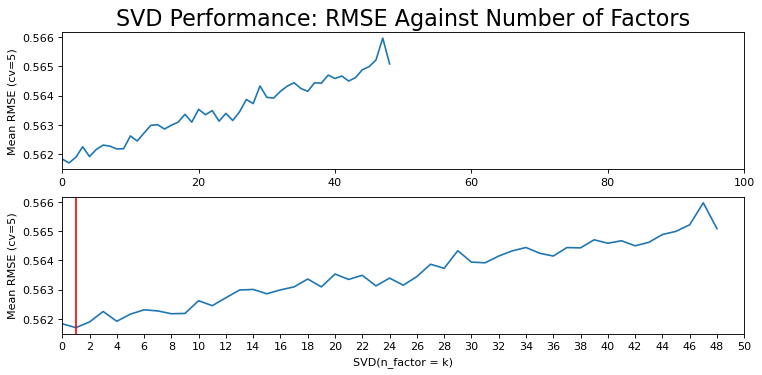

In [58]:
plot_rmse(rmse_results,"SVD")

In [53]:
svd_validate = factor_count(SVD, surprise_reviews)

TypeError: 'SVD' object is not callable

In [ ]:
svd_validate

In [61]:
def plot_rmse(rmse, algorithm):
    plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(rmse)
    plt.xlim(0,50)
    plt.title("SVD RMSE Performance vs Factor Count", size = 20 )
    plt.ylabel("Avg RMSE")


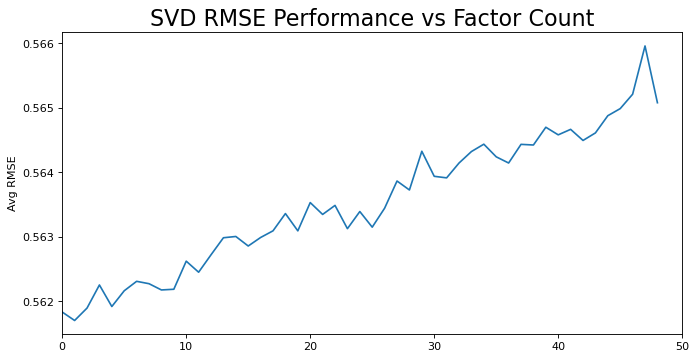

In [62]:
plot_rmse(rmse_results,"SVD")

In [ ]:
svd_validate

In [63]:
rmse_results

[0.5618337207334081,
 0.5617027643852551,
 0.5618953627567312,
 0.5622537333910667,
 0.561919480939958,
 0.562163868410854,
 0.5623104946004754,
 0.5622735070766877,
 0.5621766373304237,
 0.5621872738101192,
 0.5626232042492078,
 0.5624518251128674,
 0.56272210795037,
 0.5629863912136068,
 0.5630061373165625,
 0.5628583840069438,
 0.5629905151259549,
 0.5630938146655079,
 0.5633615998640364,
 0.5630934012409696,
 0.5635320648163235,
 0.563348151996794,
 0.5634881270104455,
 0.5631272572988977,
 0.563393085175909,
 0.56315066856793,
 0.5634449417058692,
 0.5638665052282393,
 0.5637275205546061,
 0.5643279457992335,
 0.5639395522327406,
 0.5639154335384354,
 0.5641455434401056,
 0.5643235724569917,
 0.5644378185539765,
 0.5642418878773785,
 0.5641458416942281,
 0.5644351737083028,
 0.5644252013679182,
 0.5647006752597294,
 0.5645828113200609,
 0.5646679482977479,
 0.5644957382225242,
 0.5646128709049087,
 0.5648797916139304,
 0.5649897762222218,
 0.5652128342940429,
 0.5659618132607942,
